# Bank Customers Churn
## Artificial Neural Network Model using Keras and Tensorflow with 85% Acuuracy
---
## About Dataset
---
### Context
* A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.
---
### Content
* What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
---
### Acknowledgements
* We wouldn't be here without the help of others. If you owe any attributions or thanks, include them here along with any citations of past research.
---
### Inspiration
* Your data will be in front of the world's largest data science community. What questions do you want to see answered?
---
[Source](https://www.kaggle.com/datasets/santoshd3/bank-customers)

* CustomerId : identity number
* Surname : last name
* CreditScore
* Geography : Country or region
* Gender : Male or female
* Age : customer age
* Tenure : ?
* Balance : Amount in account
* NumOfProducts
* HasCrCard
* IsActiveMember
* EstimatedSalary
* Exited

# Library 및 Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [2]:
# plt.style.use("grayscale")
# plt.style.use("ggplot")
plt.style.use("seaborn")
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 25,
             'xtick.labelsize' : 15,
             'ytick.labelsize' : 15,
             'font.size' : 15}
plt.rcParams.update(parameters)
plt.rcParams["figure.figsize"] = (15, 8)

In [3]:
bank = pd.read_csv('Churn Modeling.csv')
display(bank.head())
bank.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)

# Data Check

In [4]:
bank.shape

(10000, 14)

## Data Info

In [5]:
# RowNumber 는 index기에 필요없어보임.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Check Duplicate

In [6]:
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
bank.Surname.value_counts()

Smith         32
Scott         29
Martin        29
Walker        28
Brown         26
              ..
Pipes          1
Marquez        1
Souter         1
Birdsall       1
Shoebridge     1
Name: Surname, Length: 2932, dtype: int64

In [8]:
bank.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## 결측치 확인

In [9]:
bank.isnull().sum()
    # 결측치 없음 꿀

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Histogram

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


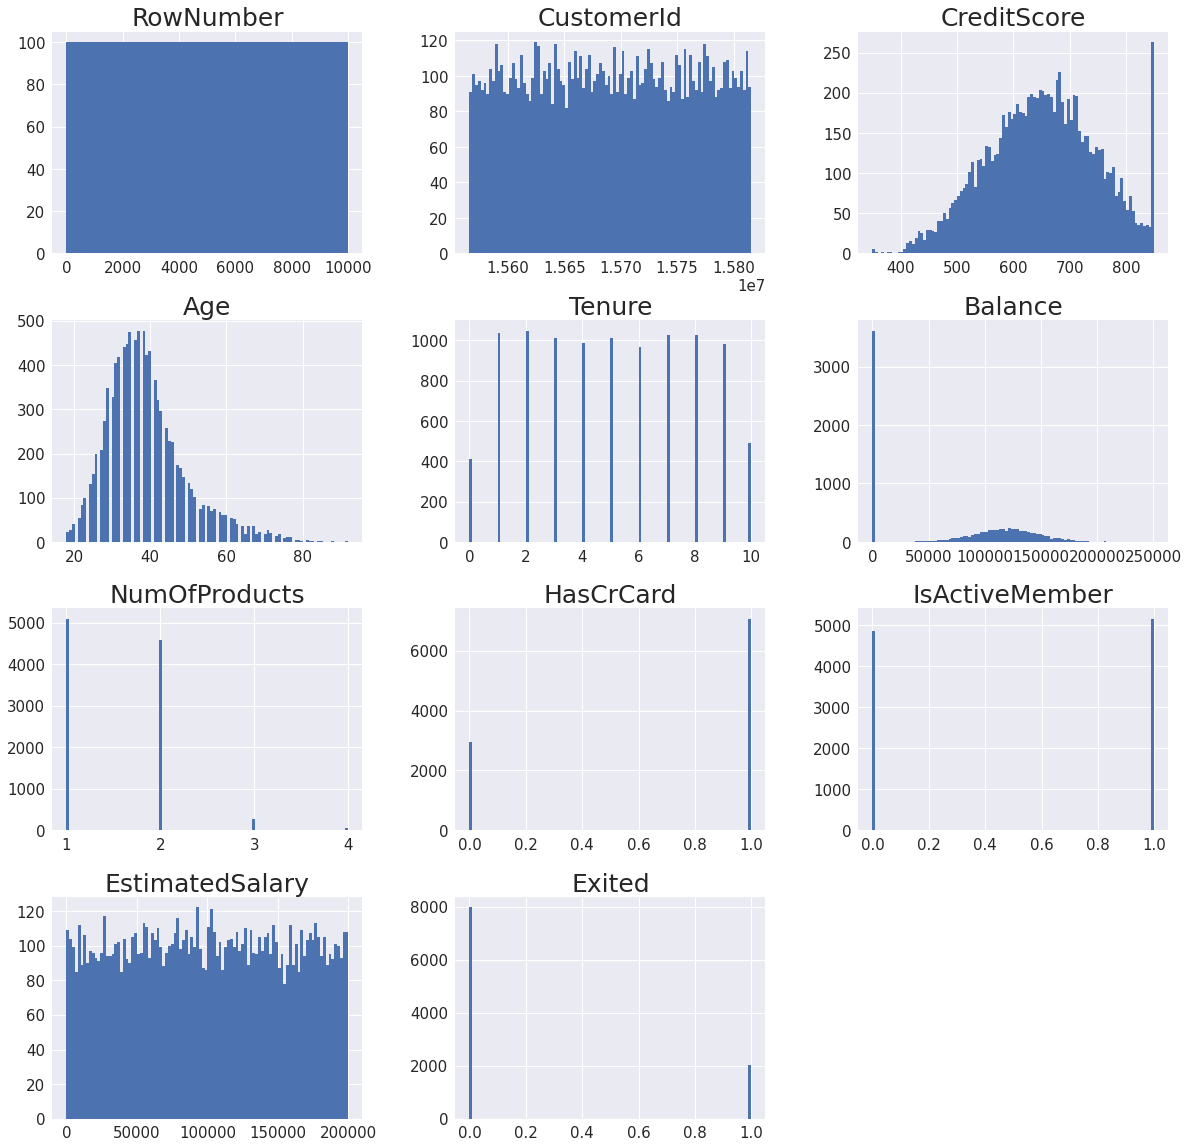

In [10]:
_ = bank.hist(bins = 100, figsize = (20, 20))

plt.figure(figsize = (30, 10))
plt.subplot(321)
sns.histplot(data = bank, x = 'Tenure')
plt.subplot(322)
sns.histplot(data = bank, x = 'NumOfProducts')
plt.subplot(323)
sns.histplot(data = bank, x = 'HasCrCard')
plt.subplot(324)
sns.histplot(data = bank, x = 'IsActiveMember')
plt.subplot(325)
sns.histplot(data = bank, x = 'Exited')

In [11]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# 모델 생성

In [12]:
df = bank.copy()

In [13]:
label_name = 'Exited'
feature_ = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
X = df[ feature_ ]
y = df[ label_name ]
print(X.shape, y.shape)

(10000, 10) (10000,)


In [14]:
X = pd.get_dummies(X)

In [15]:
tmp = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
tmp2 = ['Geography_France','Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
X_cat = X[tmp2]

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[tmp])
X_scaled = pd.DataFrame(X_scaled, columns = tmp)
X_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [17]:
X_prep = pd.concat([X_scaled, X_cat], axis = 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X_prep, y, test_size = 0.2, random_state = 42 )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [19]:
input_shape = len(X_train.keys())
input_shape

13

## relu로만 하면 0 미만 값들을 모두 0으로 처리해버리기 때문에 성능이 생각보다 높아지지 않는다. leaky_relu나 selu를 사용하거나 swish 등 다른 것들 해보기.

## Adam

In [20]:
tf.random.set_seed(1017)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='leaky_relu', input_shape = [input_shape]),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model

In [21]:
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.summary()

In [22]:
# 학습하기
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, batch_size = 256,
                    callbacks=[early_stop, PrintDot()], verbose=0)
history


....................................................................................................
....................................................................................................
...........

In [23]:
df_hist = pd.DataFrame(history.history)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

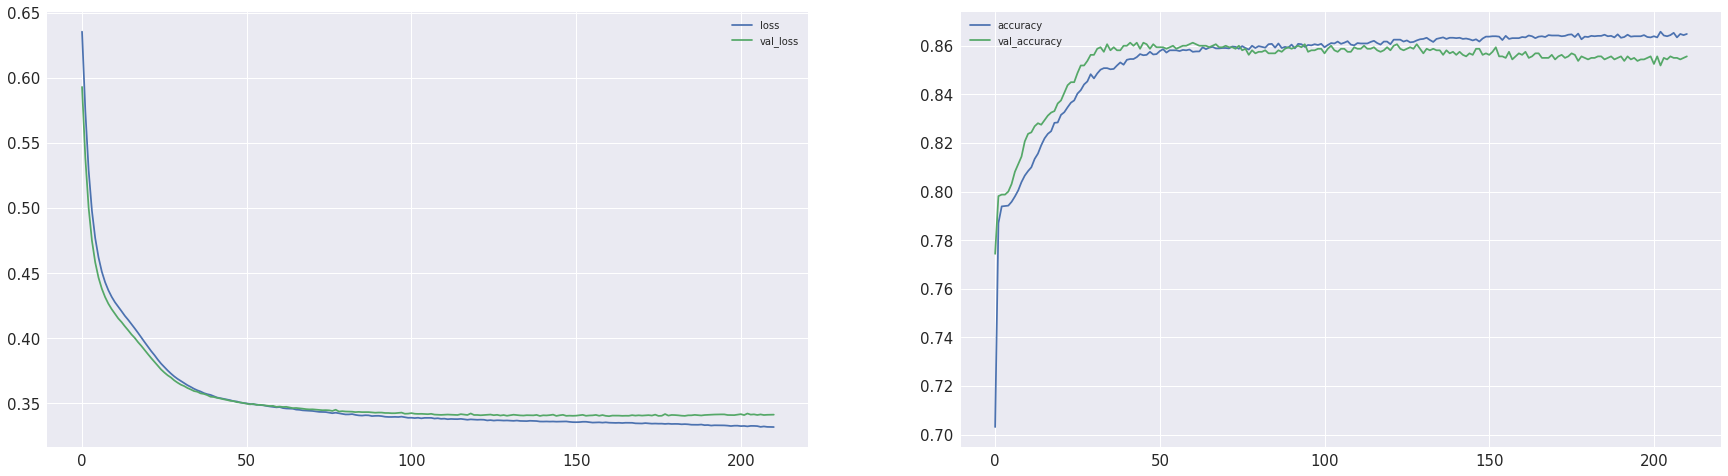

In [24]:
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots( 1, 2, figsize = (30, 8) )
df_hist[['loss', 'val_loss']].plot(ax = axes[0])
df_hist[['accuracy', 'val_accuracy']].plot(ax = axes[1])

# 예측하기

In [25]:
y_pred = model.predict(X_test).flatten()
y_predict = (y_pred > 0.5).astype(int)
test_loss, test_acc = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 611us/step - loss: 0.3414 - accuracy: 0.8620


In [26]:
(y_test == y_predict).mean()

0.862

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.3714835124201342

[Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

## Nadam

In [28]:
tf.random.set_seed(1017)
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='leaky_relu', input_shape = [input_shape]),
#     tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model2

In [29]:
model2.compile(optimizer = 'Nadam', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                168       
                                                                 
 dense_4 (Dense)             (None, 4)                 52        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 학습하기
history2 = model2.fit(X_train, y_train, epochs=1000, validation_split=0.2,  batch_size = 256,
                    callbacks=[early_stop, PrintDot()], verbose=0)


....................................................................................................
....................................................................................................
...........

In [32]:
df_hist2 = pd.DataFrame(history2.history)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

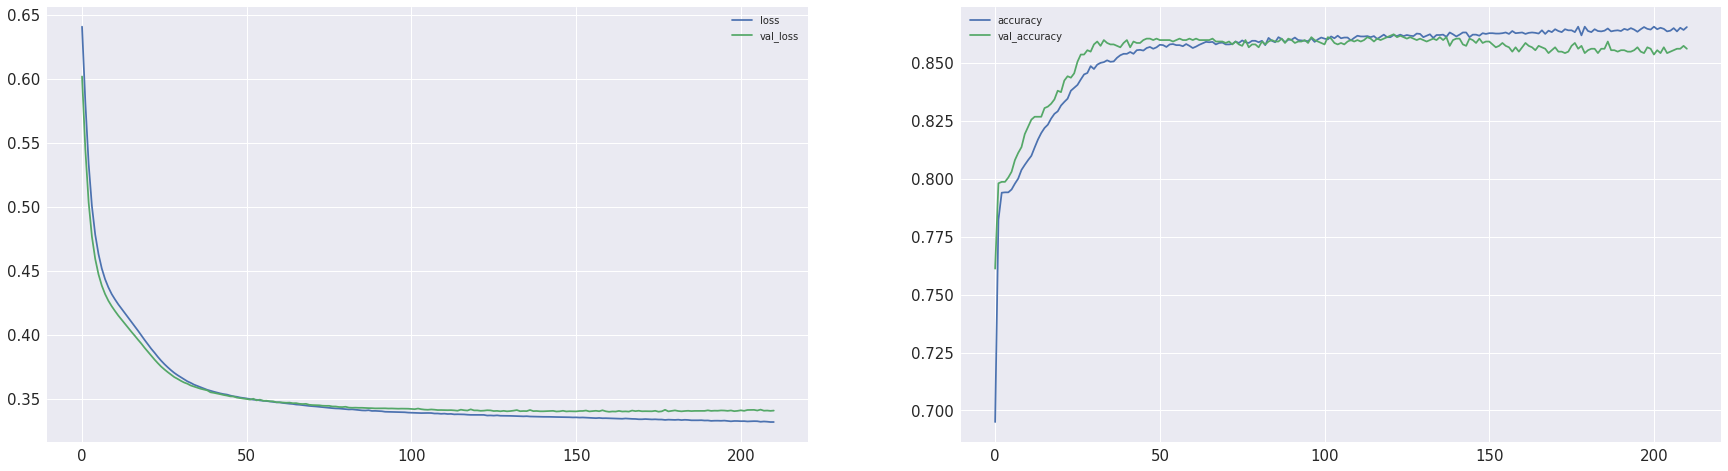

In [33]:
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots( 1, 2, figsize = (30, 8) )
df_hist2[['loss', 'val_loss']].plot(ax = axes[0])
df_hist2[['accuracy', 'val_accuracy']].plot(ax = axes[1])

# 예측하기

In [34]:
y_pred2 = model2.predict(X_test).flatten()

In [35]:
y_predict2 = (y_pred2 > 0.5).astype(int)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 600us/step - loss: 0.3413 - accuracy: 0.8630


In [36]:
(y_test == y_predict2).mean()

0.863

In [37]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_predict2))
rmse2

0.37013511046643494

## Adagrad

In [38]:
tf.random.set_seed(1017)
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='leaky_relu', input_shape = [input_shape]),
    tf.keras.layers.Dense(8, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model3

In [39]:
model3.compile(optimizer = 'Adagrad', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [40]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                168       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 학습하기
history3 = model3.fit(X_train, y_train, epochs=1000, validation_split=0.2,  batch_size = 256,
                    callbacks=[early_stop, PrintDot()], verbose=0)
history3


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [42]:
df_hist3 = pd.DataFrame(history3.history)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

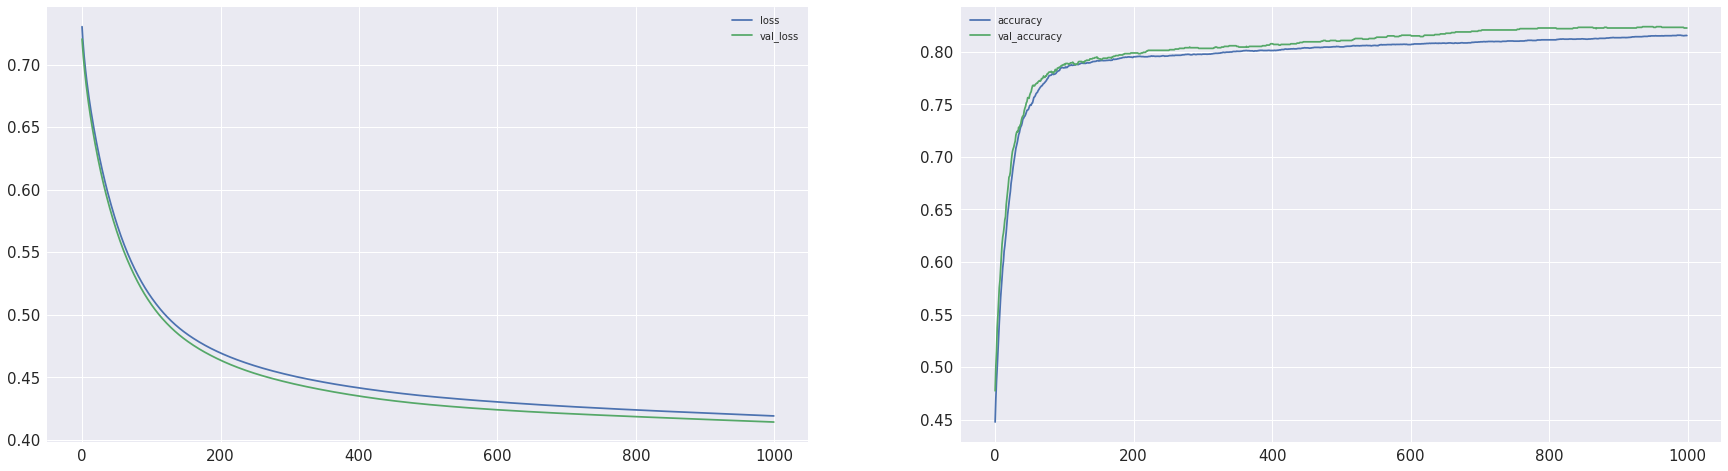

In [43]:
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots( 1, 2, figsize = (30, 8) )
df_hist3[['loss', 'val_loss']].plot(ax = axes[0])
df_hist3[['accuracy', 'val_accuracy']].plot(ax = axes[1])

# 예측하기

In [44]:
y_pred3 = model3.predict(X_test).flatten()
y_predict3 = (y_pred3 > 0.5).astype(int)

In [45]:
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 619us/step - loss: 0.4044 - accuracy: 0.8270


In [46]:
(y_test == y_predict3).mean()

0.827

In [49]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_predict3))
rmse3

0.4159326868617084

## SGD

In [50]:
tf.random.set_seed(1017)
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='leaky_relu', input_shape = [input_shape]),
    tf.keras.layers.Dense(8, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model4

In [51]:
model4.compile(optimizer = 'sgd', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [52]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                168       
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 학습하기
history4 = model4.fit(X_train, y_train, epochs=1000, validation_split=0.2,  batch_size = 256,
                    callbacks=[early_stop, PrintDot()], verbose=0)
history4


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [54]:
df_hist4 = pd.DataFrame(history4.history)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

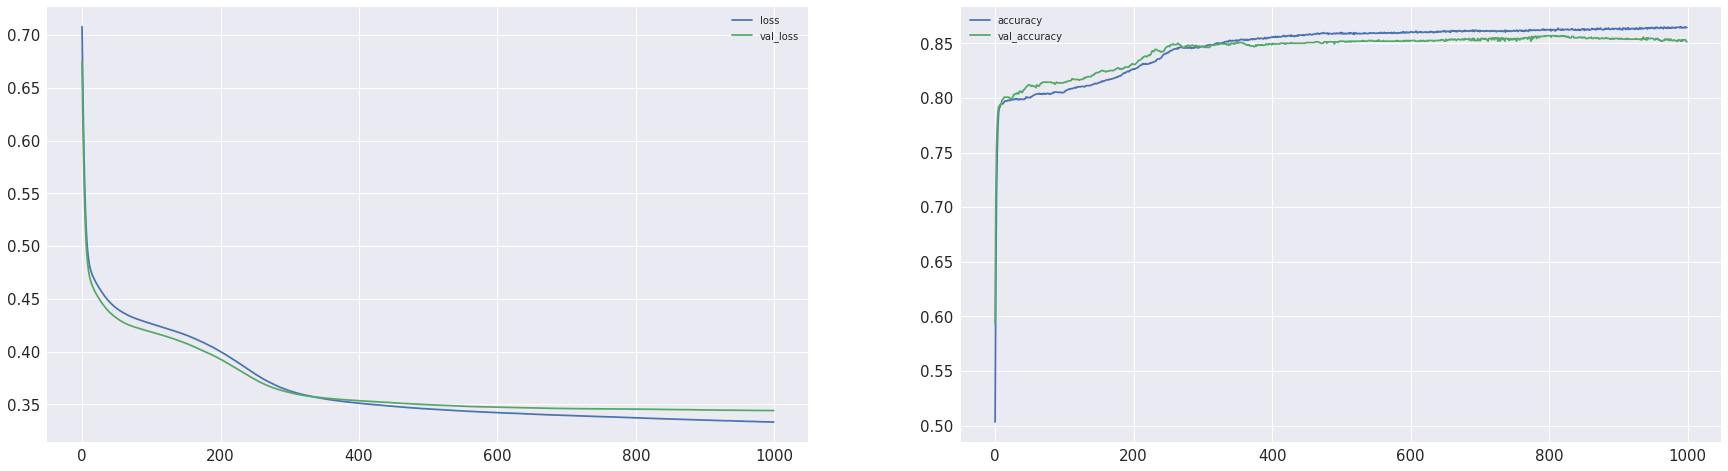

In [55]:
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots( 1, 2, figsize = (30, 8) )
df_hist4[['loss', 'val_loss']].plot(ax = axes[0])
df_hist4[['accuracy', 'val_accuracy']].plot(ax = axes[1])

# 예측하기

In [56]:
y_pred4 = model4.predict(X_test).flatten()
y_predict4 = (y_pred4 > 0.5).astype(int)

In [57]:
test_loss4, test_acc4 = model4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 614us/step - loss: 0.3419 - accuracy: 0.8580


In [58]:
(y_test == y_predict4).mean()

0.858

In [59]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_predict4))
rmse4

0.37682887362833545